# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## Mục lục
- [I. Thông tin nhóm](#i)
- [II. Thu thập dữ liệu](#ii)
    - [1. Chủ đề](#ii1)
    - [2. Nguồn dữ liệu](#ii2)
    - [3. Cách thu thập](#ii3)
- [III. Khám phá dữ liệu](#iii)
- [IV. Đặt câu hỏi có ý nghĩa và trả lời](#iv)
    - [1. Câu hỏi 1](#iv1)
    - [2. Câu hỏi 2](#iv2)
    - [3. Câu hỏi 3](#iv3)
    - [4. Câu hỏi 4](#iv4)
- [V. Nhận xét quá trình làm đồ án](#v)
    - [1. Thành viên 1](#v1)
    - [2. Thành viên 2](#v2)
    - [3. Thành viên 3](#v3)
    - [4. Ý kiến nhóm](#v4)
- [Tài liệu tham khảo](#tltk)


## I. Thông tin nhóm <a id="i"></a>

| Họ tên                | MSSV              | Công việc | Hoàn thành(%)|
|-----------------------|-------------------|-----------|--------------|
|Nguyễn Tiến Quốc      |   22120300        |           | 100%         |
|Nguyễn Trung Quôc      |   22120301        |           | 100%         |
|Võ Thành Tâm      |   22120324        |           | 100%         |

## II. Thu thập dữ liệu <a id="ii"></a>

### 1. Chủ đề <a id="ii1"></a>

### 2. Nguồn dữ liệu <a id="ii2"></a>

### 3. Cách thu thập <a id="ii3"></a>

## III. Khám phá dữ liệu  <a id="iii"></a>

## IV. Đặt câu hỏi có ý nghĩa và trả lời  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>

### 2. Câu hỏi 2 <a id="iv2"></a>
### Làm thế nào một người tiêu dùng có thể xác định đúng loại laptop phù hợp với nhu cầu bản thân?
Trả lời câu hỏi này giúp người tiêu dùng hiểu rõ các tiêu chí quan trọng để chọn mua laptop, như mục đích sử dụng, thương hiệu, bộ vi xử lí, trọng lượng, dung lượng RAM và độ phân giải màn hình... Điều này giúp họ đưa ra quyết định thông minh, chọn được sản phẩm phù hợp nhất với nhu cầu công việc, học tập hoặc giải trí của mình.

Để trả lời câu hỏi này, nhóm sẽ tiến hành phân tích 2 ý chính sau:
- Phân tích các đặc trưng riêng rẽ. Ở phần này, nhóm sẽ lần lượt trả lời các câu hỏi sau:
  - Thương hiệu nào phổ biến nhất?
  - Loại laptop được người dùng ưa chuộng nhất?
  - Các hãng sản xuất CPU và GPU nào được ưa chuộng?
  - Dung lượng RAM phổ biến nhất là gì?
  - Trọng lượng laptop phân bố như thế nào?
  - Độ phân giải màn hình phổ biến nhất là?
- Phân tích mối quan hệ giữa các đặc trưng. Ở phần này, nhóm tập trung phân tích các mối quan hệ sau:
  - Dung lượng RAM và loại laptop liên quan thế nào?
  - Trọng lượng và loại laptop có quan hệ gì không?
  - Độ phân giải màn hình và loại laptop có liên quan không?

Trước khi phân tích, ta sẽ thêm các thư viện cần thiết và đọc dữ liệu từ file `laptop_price_cleaned.csv` - Đây là file dữ liệu chứa các thông tin cần thiết.

In [335]:
# Thư viên cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Đọc dữ liệu từ file bằng pandas
df = pd.read_csv('./Dataset/laptop_price_cleaned.csv', encoding='Latin-1')

Ta xem qua 5 dòng dữ liệu đầu

In [337]:
df.head(5)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


### 2.1 Phân tích các đặc trưng riêng lẻ.
#### 2.1.1 Thương hiệu nào phổ biến nhất?
Thương hiệu phổ biến cho thấy mức độ tin cậy và lựa chọn hàng đầu của người tiêu dùng. Việc phân tích thương hiệu phổ biến sẽ giúp nắm bắt xu hướng tiêu dùng của người dùng.  
Đầu tiên, ta tìm hiểu hiện nay có các thương hiệu phổ biến nào?

In [339]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Như vậy, có 19 thương hiệu phổ biến, bao gồm:
- Apple
- HP
- Acer
- Asus
- Dell
- Lenovo
- Chuwi
- MSI
- Microsoft
- Toshiba
- Huawei
- Xiaomi
- Vero
- Razer
- Mediacom
- Samsung
- Google
- Fujitsu
- LG

Để biết được thương hiệu nào phổ biết nhất, ta tiến hành đếm số sản phẩm của từng thương hiệu.

In [342]:
# Đếm số lượng sản phẩm từng thương hiệu
brand_counts = df['Company'].value_counts()
brand_counts

Company
Dell         291
Lenovo       289
HP           267
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

Từ kết quả, ta thấy các thương hiệu **Dell**, **Lenovo** và **Lenovo** có số lượng sản phẩm khá lớn. Và **Dell** là thương hiệu phổ biến nhất với số lượng sản phẩm là **291**.

Ta sẽ trực quan bằng biểu đồ để có cái nhìn tổng quan hơn.

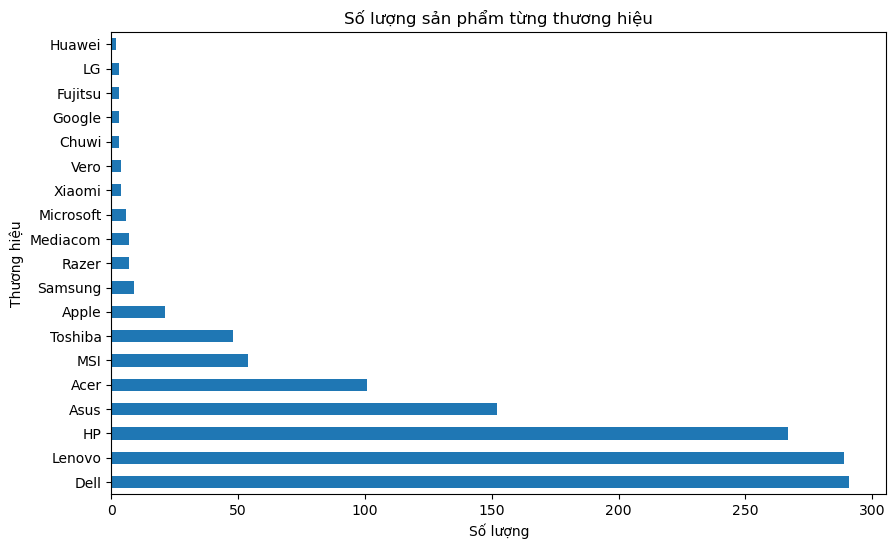

In [345]:
# Vẽ biểu đồ số lượng sản phẩm từng thương hiệu
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='barh')
plt.title('Số lượng sản phẩm từng thương hiệu')
plt.xlabel('Số lượng')
plt.ylabel('Thương hiệu')
plt.show()

Ta có thể rút được vài nhận xét:
- Có nhiều thương hiệu khác nhau tham gia vào thị trường này, cho thấy sự cạnh tranh khá cao.
- Các thương hiệu có sự khác biệt rõ rệt về số lượng sản phẩm, cho thấy sự phân hóa mạnh mẽ.
- Thương hiệu phổ biến nhất là **Dell**, kế đến là **Lenovo**, **HP**

#### 2.1.2 Loại laptop được người dùng ưa chuộng nhất?
Loại laptop sẽ phản ánh nhu cầu sử dụng cụ thể của người tiêu dùng. Vì vậy, việc xác định loại laptop ưa chuộng giúp ta nhận diện  được xu hướng tiêu dùng và mục đích sử dụng chính của người mua.  
Đầu tiên, ta xem trên thị trường có những loại laptop nào?

In [348]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

Như vậy, trên thị trường có 6 loại laptop:
- **Ultrabook**: Laptop mỏng nhẹ, pin lâu, dành cho văn phòng và di chuyển.
- **Notebook**: Laptop tiêu chuẩn, cân bằng hiệu năng và giá cả.
- **Netbook**: Laptop nhỏ gọn, cấu hình thấp, phù hợp nhu cầu cơ bản.
- **Gaming**: Laptop hiệu năng cao, chuyên chơi game và đồ họa.
- **2 in 1 Convertible**: Laptop lai, có thể gập thành tablet, đa năng.
- **WorkStation**: Laptop cấu hình cực mạnh, dành cho công việc chuyên môn cao.

Tương tự, ta sẽ tính toán số lượng sản phẩm ứng với từng loại Laptop.

In [351]:
type_counts = df['TypeName'].value_counts()
type_counts

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            28
Netbook                23
Name: count, dtype: int64

Để dễ quan sát, ta vẽ biểu đồ bar chart đễ trực quan.

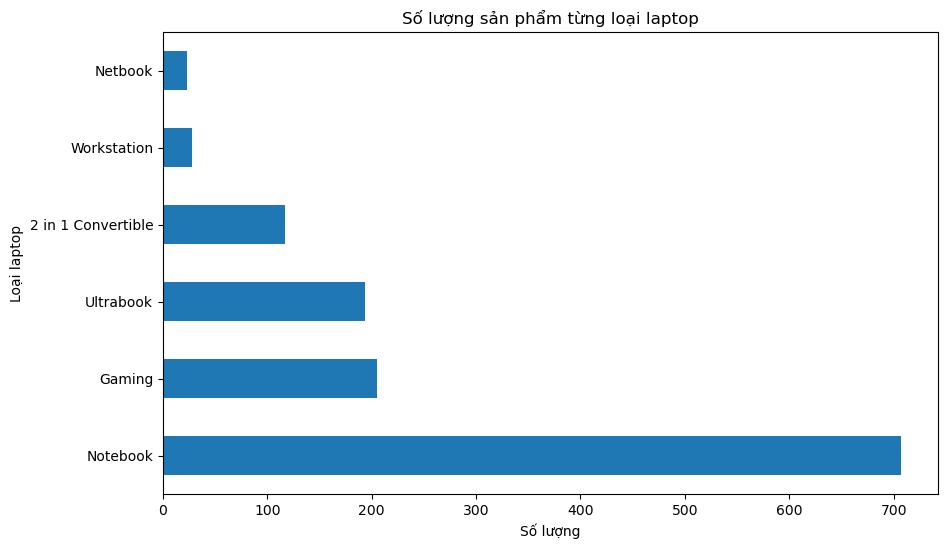

In [353]:
# Biểu đồ số lượng sản phẩm từng loại laptop
plt.figure(figsize=(10, 6))
type_counts.plot(kind='barh')
plt.title('Số lượng sản phẩm từng loại laptop')
plt.xlabel('Số lượng')
plt.ylabel('Loại laptop')
plt.show()

Từ biểu đồ, ta có nhận xét:
- Laptop Notebook chiếm ưu thế: Loại laptop này có số lượng sản phẩm bán ra lớn nhất, vượt trội so với các loại khác. Có vẻ người dùng khá ưa chuộng loại laptop này.
- Các loại laptop khác có số lượng vừa phải, không vượt trội như `Notebook', có thể do chúng chỉ phục vụ cho một số đối tượng người dùng cụ thể.
- Nhìn chung, thị trường laptop cũng khá đa dạng, có nhiều loại laptop khác nhau.

#### 2.1.3 Các hãng sản xuất CPU và GPU nào được ưa chuộng?
CPU và GPU là yếu tố then chốt quyết định hiệu năng, ảnh hưởng trực tiếp đến lựa chọn của người tiêu dùng. Vì thế, ta sẽ tìm hiểu xem, các hãng sản xuất nào đang được người dùng ưu chuộng.  
Đầu tiên, ta xem trên thị trường có những hãng sản xuất CPU và GPU nào.

In [356]:
df['CPU_company'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [357]:
df['GPU_company'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

Những hãng sản xuất CPU và GPU hiện nay không nhiều:
- **Intel**: Sản xuất cả CPU và GPU.
- **AMD**: Sản xuất cả CPU và GPU.
- **Nvidia**: Sản xuất GPU.
- **ARM**: Sản xuất GPU.

Tiếp theo, ta cần tính toán số lượng latop sử dụng CPU/GPU của từng hãng sản xuất. Rồi vẽ biểu đồ trực quan.

In [360]:
cpu_counts = df['CPU_company'].value_counts()
cpu_counts

CPU_company
Intel      1213
AMD          60
Samsung       1
Name: count, dtype: int64

Có vẻ số sản phẩm dùng CPU **Intel** khá áp đảo.

In [362]:
gpu_counts = df['GPU_company'].value_counts()
gpu_counts

GPU_company
Intel     704
Nvidia    395
AMD       174
ARM         1
Name: count, dtype: int64

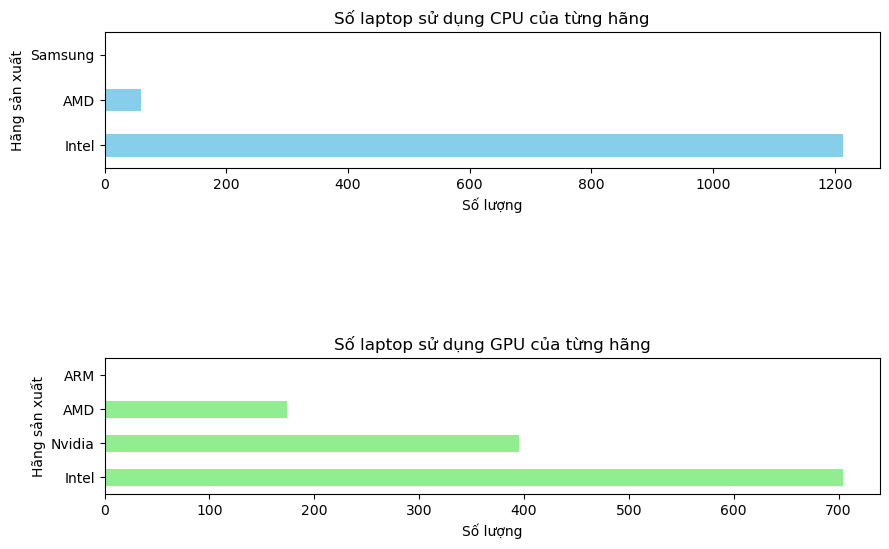

In [363]:
# Visualize the results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
cpu_counts.plot(kind='barh', color='skyblue')
plt.title('Số laptop sử dụng CPU của từng hãng')
plt.xlabel('Số lượng')
plt.ylabel('Hãng sản xuất')

plt.subplot(3, 1, 3)
gpu_counts.plot(kind='barh', color='lightgreen')
plt.title('Số laptop sử dụng GPU của từng hãng')
plt.xlabel('Số lượng')
plt.ylabel('Hãng sản xuất')
plt.show()

Ta có nhận xét sau:
- Bộ xử lí của  Intel rất được ưa chuộng, phần lớn các laptop trên thị trường đều dùng trang bị CPU VÀ GPU của Intel. Có thể nói Intel đang dẫn đầu trong lĩnh vực này.
- AMD, Nvidia tuy không bằng Intel, những cũng chiếm thị phần đáng kể.
- Samsung cũng có mặt trong sản xuất CPU nhưng quy mô rất nhỏ.
- ARM có mặt trong sản xuất GPU, nhưng quy mô cũng rất nhỏ.  

#### 2.1.4 Dung lượng RAM phổ biến nhất là gì?
Dung lượng RAM ảnh hưởng đến khả năng đáp ứng các tác vụ thường ngày, quyết định trải nghiệm người dùng. Việc phân tích dung lượng RAM sẽ giúp chúng ta hiểu rõ nhu cầu của người tiêu dùng đối với các dòng sản phẩm.  
Đầu tiên, ta sẽ tìm hiểu các dung lượng RAM đang phổ biến.

In [366]:
ram_counts = df['Ram'].value_counts()
ram_counts

Ram
8     612
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

Từ kết quả, ta thấy được dung lượng RAM laptop khá đa dạng, thấp nhất là 2GB, trải dài tới cao nhất là 64GB.  
Tiếp theo, ta sẽ vẽ biểu đồ trực quan để có cái nhìn tổng quan hơn.

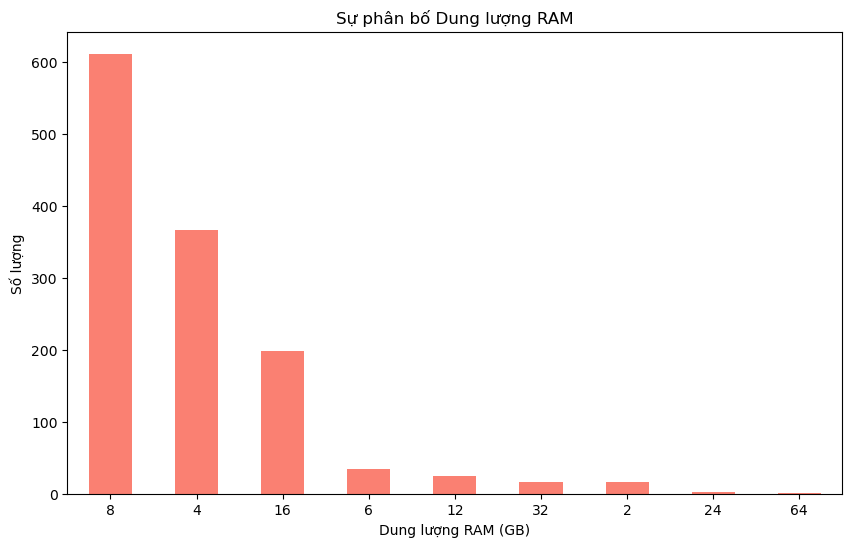

In [368]:
# Trực quan sự phân bố của RAM
plt.figure(figsize=(10, 6))
ram_counts.plot(kind='bar', color='salmon')
plt.title('Sự phân bố Dung lượng RAM')
plt.xlabel('Dung lượng RAM (GB)')
plt.xticks(rotation=0)
plt.ylabel('Số lượng')
plt.show()

Dựa trên biểu đồ, ta có thể rút ra một số nhận xét sau:
- Dung lượng RAM 8GB là phổ biến nhất, chiếm tỷ lệ cao nhất trong tổng số các loại dung lượng RAM được khảo sát. Điều này cho thấy rằng, trong thời gian gần đây, 8GB RAM đã trở thành mức RAM tiêu chuẩn.
- Mặc dù không bằng 8GB, dung lượng RAM 4GB vẫn được sử dụng khá phổ biến.
- Các dung lượng RAM khác như 16GB, 6GB, 12GB, 32GB, 2GB, 24GB, 64GB có số lượng máy sử dụng ít hơn rất nhiều so với 8GB và 4GB. Có thể do chúng được sử dụng cho thiết bị chuyên dụng hoặc cấu hình cao,...

#### 2.1.5 Trọng lượng laptop phân bố như thế nào?
Trả lời câu hỏi này sẽ cung cấp thông tin về các loại laptop phổ biến theo trọng lượng, từ đó hiểu được xu hướng lựa chọn của người tiêu dùng. Ví dụ: Người dùng có ưu tiên laptop nhẹ để di chuyển hay laptop nặng để làm việc hiệu năng cao.  

Để thuận tiện trả lời, chúng ta sẽ chia trọng lượng laptop thành 3 mức:
- Nhẹ (Light): 1 kg đến 1,5 kg 
- Trung bình (Medium): 1,5 kg đến 2,5 kg
- Nặng (Heavy): Từ 2,5 kg trở lên



Ta sẽ thêm cột `Weight_catagory` để phân loại trọng lượng laptop

In [372]:
# Hàm phân loại trọng lượng laptop
def classify_weight(weight):
    if weight < 1.5:
        return 'Light'
    elif 1.5 <= weight < 2.5:
        return 'Medium'
    else:
        return 'Heavy'

# Áp dụng phân loại
df['Weight_catagory'] = df['Weight'].apply(classify_weight)

Ta xem thử vài dòng đầu để kiểm tra.

In [374]:
df[['Weight', 'Weight_catagory']].head()

,Weight,Weight_catagory
0,1.37,Light
1,1.34,Light
2,1.86,Medium
3,1.83,Medium
4,1.37,Light


Như vậy, chúng ta đã phân loại thành công.  

Tiếp theo, chúng ta sẽ tính toán số lượng laptop ở từng mức và vẽ biểu đồ trực quan.

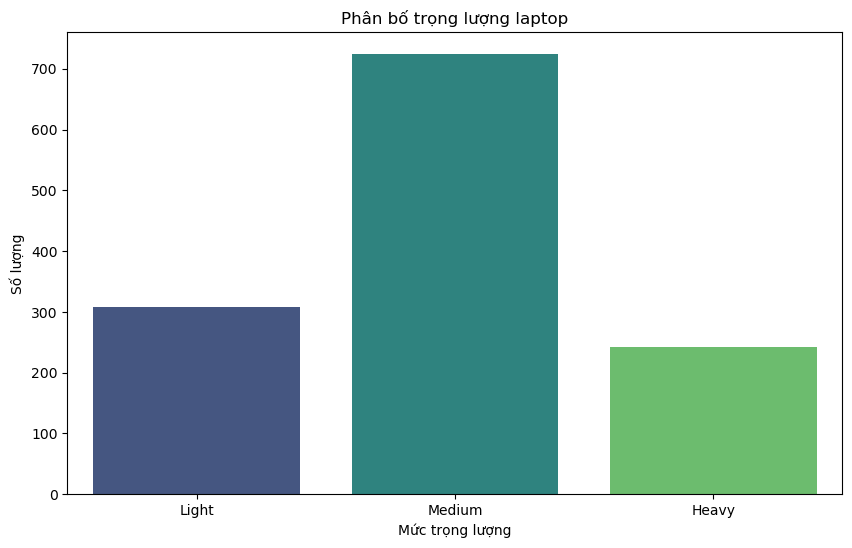

In [376]:
# Trực quan
plt.figure(figsize=(10, 6))
sns.countplot(x='Weight_catagory', data=df, palette='viridis')
plt.title('Phân bố trọng lượng laptop')
plt.xlabel('Mức trọng lượng')
plt.ylabel('Số lượng')
plt.show()

Từ biểu đồ, ta có thể nhận xét:
- Số lượng laptop có trọng lượng trung bình chiếm tỷ lệ cao nhất, cho thấy người dùng thường ưu tiên các mẫu laptop vừa phải, không quá nặng để di chuyển.
- Số lượng laptop có trọng lượng nhẹ và nặng ở mức trung bình, có thể chúng chỉ phù hợp với những người dùng có nhu cầu đặc biệt, hay phù hợp với sở thích cá nhân,..

#### 2.1.6 Độ phân giải màn hình phổ biến nhất là?
Độ phân giải màn hình là chỉ số cho biết số lượng các điểm ảnh (pixel) trên màn hình, được thể hiện bằng phép nhân giữa số điểm ảnh của hàng và cột tương ứng. Độ phân giải càng cao cho khả năng hiển thị hình ảnh càng sắc nét và trung thực (Với cùng kích thước màn hình).   
Ví dụ: 1920x1080 là 1 độ phân giải màn hình


Hai cột liên quan đến độ phân giải màn hình là `ScreenW` và `ScreenH`. Ta sẽ xem qua nội dung hai cột này.

In [380]:
df[['ScreenW', 'ScreenH']].head(5)

,ScreenW,ScreenH
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600


Để phân tích, chúng ta sẽ nối giá trị hai cột này bằng `x`. Ví dụ: ScreenW: 2560, ScreenH: 1600 sẽ là 2560x1600.  
Kết quả sẽ được lưu vào `ScreenResolution`

In [382]:
# Kết hợp 'ScreenW',  'ScreenH' lưu vào 'ScreenResolution'
df['ScreenResolution'] = df['ScreenW'].astype(str) + 'x' + df['ScreenH'].astype(str)

Ta kiểm tra thử 5 dòng đầu.

In [384]:
df[['ScreenW', 'ScreenH', 'ScreenResolution']].head(5)

,ScreenW,ScreenH,ScreenResolution
0,2560,1600,2560x1600
1,1440,900,1440x900
2,1920,1080,1920x1080
3,2880,1800,2880x1800
4,2560,1600,2560x1600


Như vậy, ta đã xử lí xong.  

Bây giờ, chúng ta sẽ vẽ biểu đồ để xem `Độ phân giải màn hình` phân bố ra sao.

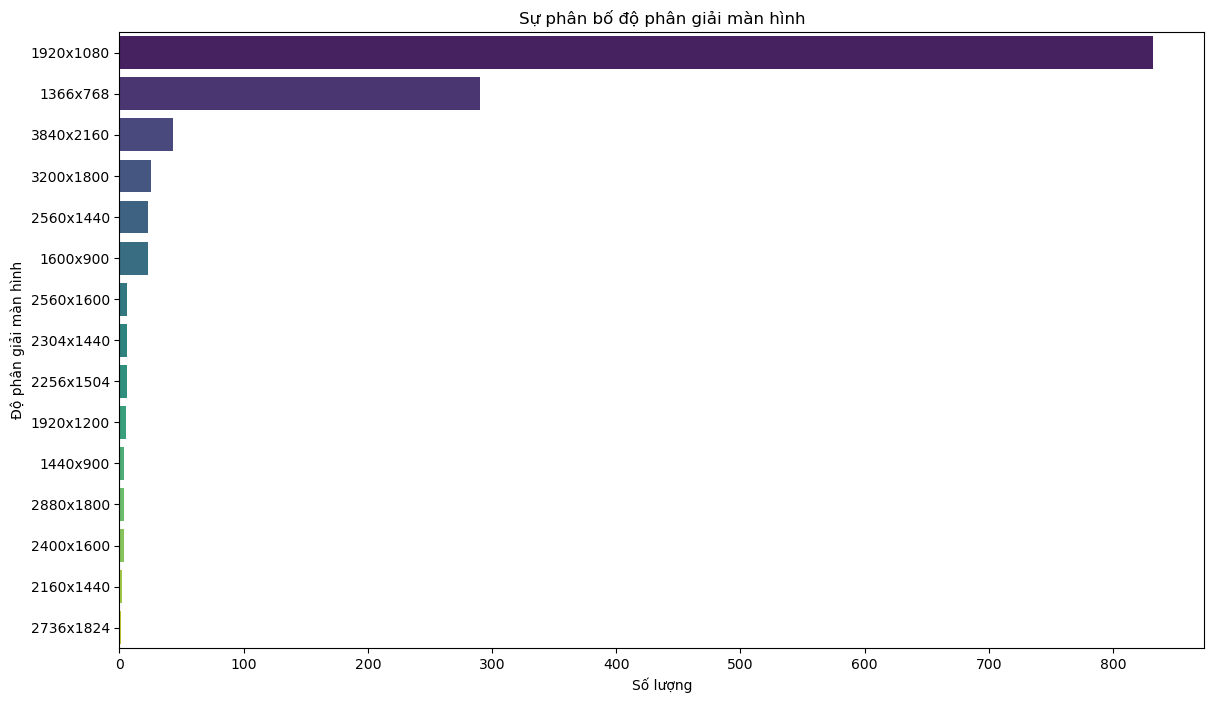

In [386]:
# Trực quan
plt.figure(figsize=(14, 8))
sns.countplot(y='ScreenResolution', data=df, order=df['ScreenResolution'].value_counts().index, palette='viridis')
plt.title('Sự phân bố độ phân giải màn hình')
plt.xlabel('Số lượng')
plt.ylabel('Độ phân giải màn hình')
plt.show()

Từ biểu đồ, ta có thể nhận xét:
- Độ phân giải 1920x1080 (Full HD) là phổ biến nhất, chiếm số lượng lớn các thiết bị. Điều này cho thấy đa số người dùng đang ưu tiên độ phân giải này.
- Các độ phân giải khác như 1366x768, 3840x2160 (4K) cũng có số lượng đáng kể, tuy nhiên không bằng Full HD.

#### 2.2 Phân tích mối quan hệ giữa các đặc trưng.
Trước khi phân tích, ta xem lại từng loại laptop:
- **Ultrabook**: Laptop mỏng nhẹ, pin lâu, dành cho văn phòng và di chuyển.
- **Notebook**: Laptop tiêu chuẩn, cân bằng hiệu năng và giá cả.
- **Netbook**: Laptop nhỏ gọn, cấu hình thấp, phù hợp nhu cầu cơ bản.
- **Gaming**: Laptop hiệu năng cao, chuyên chơi game và đồ họa.
- **2 in 1 Convertible**: Laptop lai, có thể gập thành tablet, đa năng.
- **WorkStation**: Laptop cấu hình cực mạnh, dành cho công việc chuyên môn cao.

Bắt đầu phân tích:

#### 2.2.1 Dung lượng RAM và loại laptop liên quan thế nào?
Trả lời câu hỏi này giúp ta hiểu rõ xu hướng người tiêu dùng khi chọn cấu hình RAM theo mục đích sử dụng. Ví dụ, laptop gaming thường đi kèm RAM lớn để đáp ứng các tác vụ nặng, trong khi laptop văn phòng chỉ cần RAM vừa đủ,..

Để hiểu rõ, chúng ta sẽ dùng biểu đồ `box plot` để trực quan mối quan hệ này.

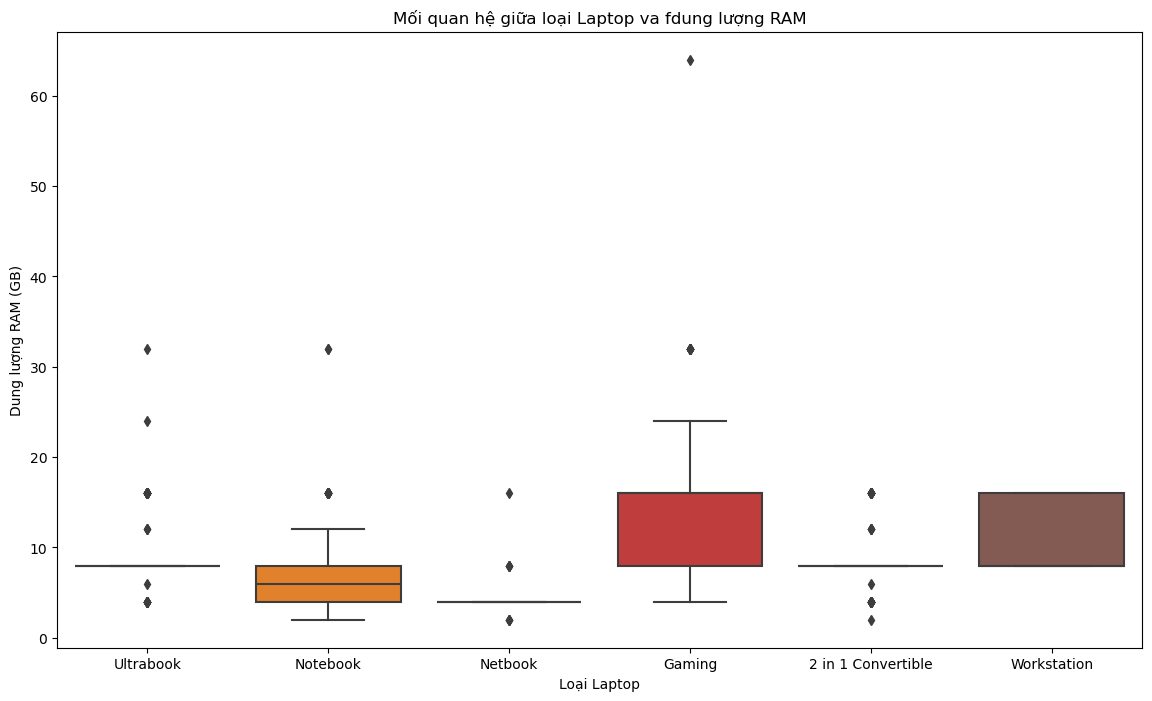

In [390]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='TypeName', y='Ram', data=df)
plt.title('Mối quan hệ giữa loại Laptop va fdung lượng RAM')
plt.xlabel('Loại Laptop')
plt.ylabel('Dung lượng RAM (GB)')
plt.xticks(rotation=0)
plt.show()

Từ biểu đồ, ta có thể nhận xét:
- Phần lớn các Ultrabook có dung lượng RAM khá khiêm tốn, tập trung ở mức 8GB trở xuống. Tuy nhiên có một số Ultrabook có lượng RAM rất cao.
- Notebook có dung lượng RAM trung bình, tập trung chủ yếu ở mức 8GB. Khoảng giá trị của Notebook khá hẹp, cho thấy sự đồng đều hơn so với Ultrabook.
- Netbook có dung lượng RAM thấp nhất trong tất cả các loại laptop, chủ yếu tập trung ở mức 4GB trở xuống.
- Gaming laptop có dung lượng RAM cao nhất, trung bình từ 16GB trở lên. Điều này cho thấy nhu cầu về hiệu năng cao của các tựa game hiện đại.
- 2-in-1 Convertible có dung lượng RAM trung bình, tương đương với Notebook. Tuy nhiên, có một số mẫu có dung lượng RAM rất cao
- Workstation có dung lượng RAM rất cao, thường từ 16GB trở lên, thậm chí có thể lên đến 64GB. Điều này đáp ứng nhu cầu xử lý các tác vụ nặng như đồ họa 3D, render video, ...

Như vậy, dung lượng RAM liên quan đến loại laptop:
- Các loại laptop có nhu cầu về hiệu năng cao như Gaming và Workstation thường được trang bị dung lượng RAM lớn hơn so với các loại laptop khác.
- Ultrabook và Netbook thường được thiết kế cho các tác vụ cơ bản nên có dung lượng RAM thấp hơn.
- Notebook và 2-in-1 Convertible có dung lượng RAM ở mức trung bình.

### 2.2.2 Trọng lượng và loại laptop có quan hệ gì không?
Trả lời câu hỏi này giúp người tiêu dùng hiểu rõ mối liên hệ giữa trọng lượng và mục đích sử dụng laptop. Điều này hỗ trợ họ chọn mua sản phẩm phù hợp với nhu cầu, như ultrabook nhẹ để di chuyển hoặc laptop gaming nặng để chơi game và làm việc chuyên sâu.

Để trả lời, ta cũng sẽ vẽ biểu đồ `Stacked Bar Chart` để thể hiện mối quan hệ

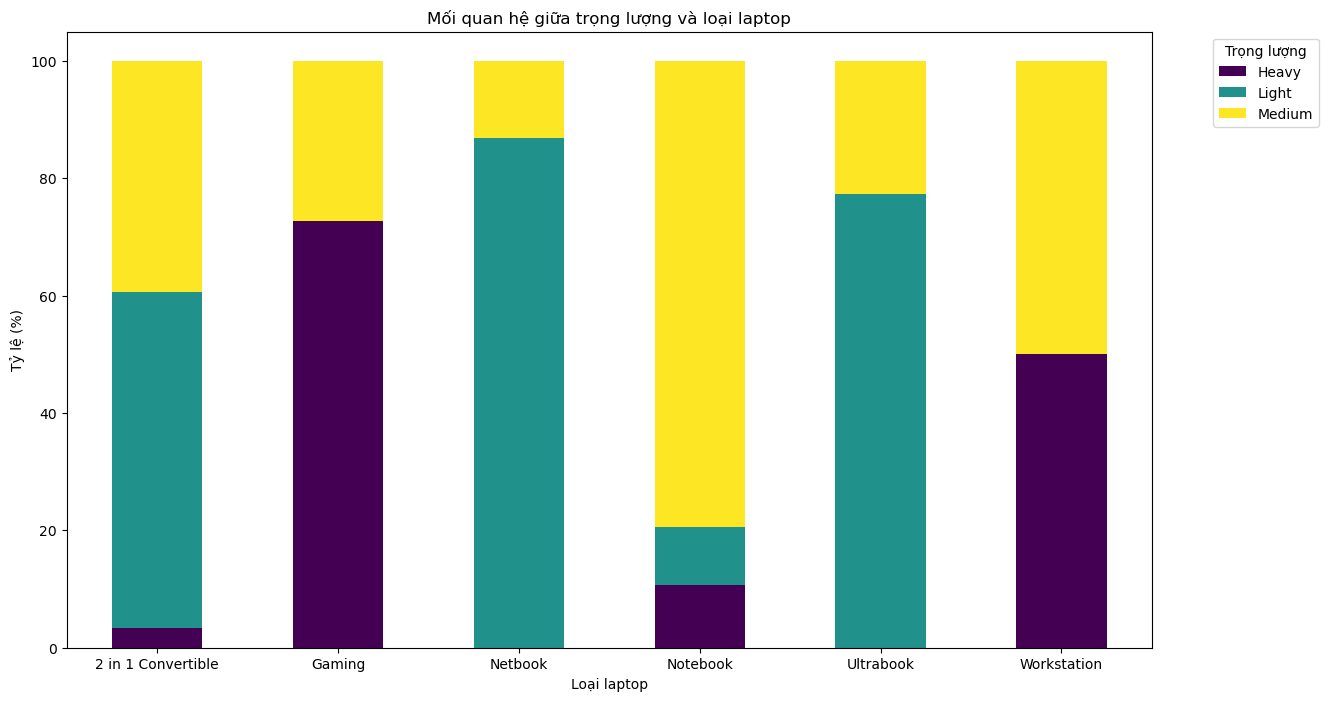

In [393]:
# Trực quan
crosstab = pd.crosstab(df['TypeName'], df['Weight_catagory'])
crosstab_percent = crosstab.div(crosstab.sum(1), axis=0) * 100

# Vẽ stacked bar chart với tỷ lệ (%)
crosstab_percent.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Mối quan hệ giữa trọng lượng và loại laptop')
plt.xlabel('Loại laptop')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=0)
plt.legend(title='Trọng lượng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Từ biểu đồ, ta có những nhận xét sau:
- Laptop Gaming và Workstation thường nặng hơn: Điều này dễ hiểu vì các loại laptop này thường được trang bị cấu hình mạnh mẽ, được trang bị nhiều linh kiện, làm tăng trọng lượng máy.
- Laptop Ultrabook và 2-in-1 Convertible thường nhẹ hơn: Các loại laptop này được thiết kế hướng tới tính di động, vì vậy trọng lượng nhẹ là một ưu tiên hàng đầu.
- Laptop Notebook có trọng lượng trung bình. Vì đây là loại laptop phổ biến, có sự cân bằng giữa hiệu năng và trọng lượng, phù hợp với nhiều nhu cầu sử dụng khác nhau.
- Laptop Netbook thường có trọng lượng nhẹ nhất.

### 2.2.3 Độ phân giải màn hình và loại laptop có liên quan với nhau không
Trả lời câu hỏi này giúp xác định mối liên hệ giữa loại laptop và độ phân giải màn hình, ví dụ, laptop gaming hoặc thiết kế đồ họa thường sử dụng màn hình độ phân giải cao (Full HD, 4K), trong khi laptop văn phòng chủ yếu dùng độ phân giải cơ bản (HD hoặc Full HD). Thông tin này hỗ trợ người tiêu dùng chọn laptop phù hợp với yêu cầu hiển thị của họ và giúp nhà sản xuất định hình sản phẩm cho từng phân khúc khách hàng.

Để trả lời, ta cũng sẽ vẽ biểu đồ Stacked Bar Chart để thể hiện mối quan hệ

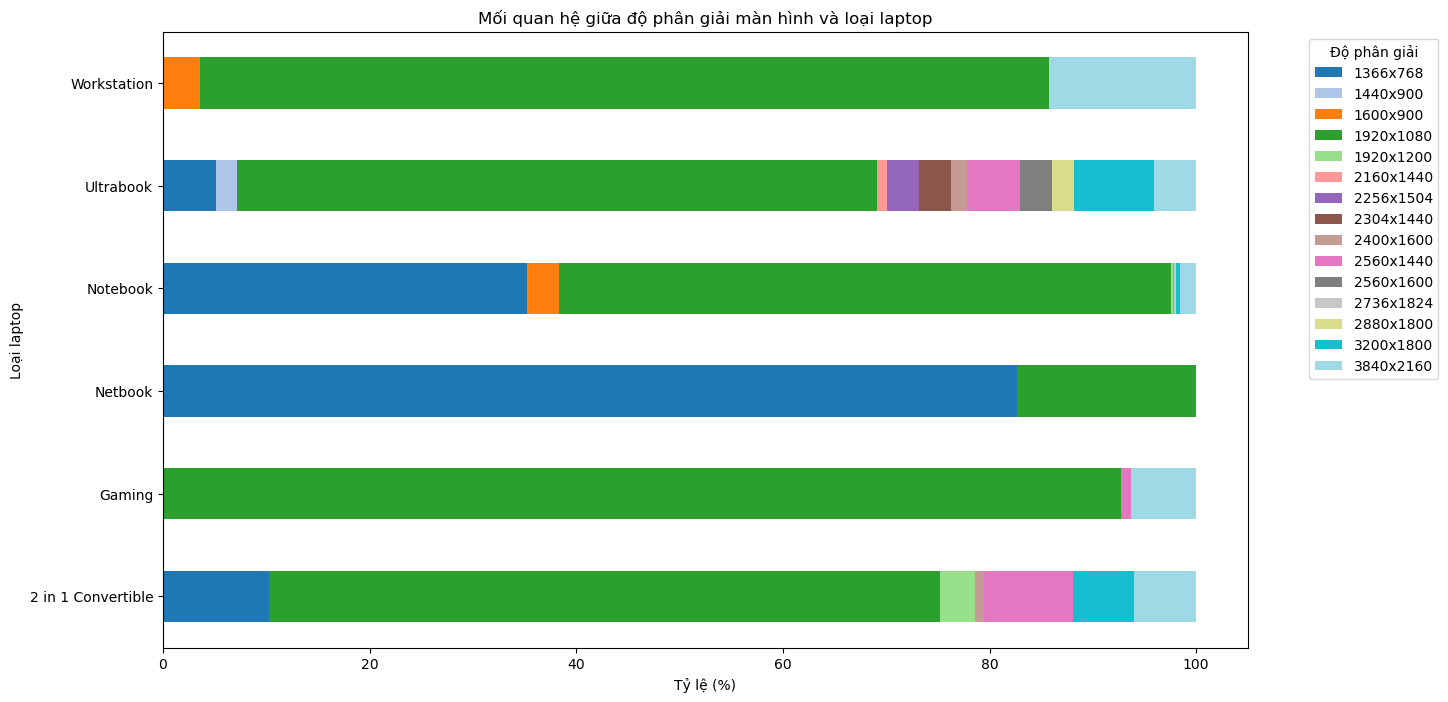

In [397]:
# Trực quan
crosstab = pd.crosstab(df['TypeName'], df['ScreenResolution'])
crosstab_percent = crosstab.div(crosstab.sum(1), axis=0) * 100

# Vẽ stacked bar chart với tỷ lệ (%)
crosstab_percent.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Mối quan hệ giữa độ phân giải màn hình và loại laptop')
plt.xlabel('Tỷ lệ (%)')
plt.ylabel('Loại laptop')
plt.legend(title='Độ phân giải', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Từ biểu đồ, ta có nhận xét sau:
- Laptop Gaming chủ yếu tập trung vào các độ phân giải cao như 1920x1080, 2560x1440, 3840x2160 (4K). Điều này cho thấy game thủ thường ưu tiên màn hình có độ phân giải cao để tận hưởng đồ họa sắc nét, mượt mà.
- Workstation tương tự như laptop Gaming, Workstation thường sử dụng các độ phân giải cao để đáp ứng nhu cầu xử lý hình ảnh, video chuyên nghiệp.
- Notebook có sự phân bố độ phân giải đa dạng hơn, từ 1366x768 đến 1920x1080. Điều này cho thấy Notebook đáp ứng được nhiều nhu cầu khác nhau của người dùng, từ cơ bản đến nâng cao.
- Ultrabook và 2-in-1 Convertible: Chủ yếu tập trung vào các độ phân giải Full HD (1920x1080) và các độ phân giải cao hơn một chút như 2560x1440. Cho thấy người dùng mua loại laptop này ưu tiên màn hình sắc nét.
- Netbook: Thường sử dụng các độ phân giải thấp như 1366x768, phù hợp với kích thước màn hình nhỏ và cấu hình hạn chế.

### **Kết luận**:
Để chọn laptop phù hơp với bản thân, người dùng có thể :
1. Chọn theo thương hiệu:
   - Các thương hiệu như về **Dell**, **Lenovo**, **HP** đều là những thương hiệu phổ biển.
   - Người dùng có thể cân nhắc chọn 3 thương hiệu trên nếu không có yêu cầu đặc biệt.
2. Chọn theo loại laptop:
   - Ultrabook: Mỏng nhẹ, pin lâu, dành cho người hay di chuyển hoặc làm việc văn phòng.
   - Gaming Laptop: Cấu hình mạnh, chuyên chơi game hoặc làm đồ họa.
   - Workstation: Hiệu năng cao, phục vụ công việc chuyên sâu như thiết kế 3D hay lập trình.
   - Notebook: Lựa chọn phổ biến, cân bằng giữa hiệu năng và giá cả, phù hợp với nhu cầu hàng ngày.
   - Netbook: Rất nhỏ gọn, cấu hình thấp, dành cho nhu cầu cơ bản như lướt web, xem video.
   - 2-in-1 Convertible: Vừa là laptop, vừa là tablet, linh hoạt trong sử dụng.
3. Chọn theo cấu hình:
   - CPU/GPU người dùng có thể lựa chọn tùy thích.
   - Dung lượng RAM:
      - Nếu chỉ dùng các tác vụ cơ bản: RAM 2GB, 4GB là vừa đủ
      - Có như cầu chơi game tầm trung, xử lí tác vụ không quá nặng có thể cân nhắc dung lượng RAM 8GB, 16GB.
      - Đối với các như cầu cao hơn, chọn laptop có dung lượng RAM 32GB, thậm chỉs là 64GB.
4. Chọn theo trọng lượng:
   - Người di chuyển nhiều: có thể chọn laptop nhẹ (1-1.5kg)
   - Người làm việc cố định: có thể chọn các trọng lượng laptop tùy theo sở thích: 1-1.5kg, 1.5-2kg hay >2.5kg
5. Chọn theo độ phân giải màn hình:
   - Full HD (1920x1080): Phù hợp với đa số người dùng nhờ chất lượng hình ảnh rõ nét, giá hợp lý.
   - 4K (3840x2160): Phù hợp cho người làm thiết kế đồ họa hoặc chỉnh sửa video chuyên nghiệp.
   - Các độ phân giải khác người dùng có thể tùy ý lựa chọn dựa vào như cầu cụ thể của bản thân.
  
Ví dụ: Một người có nhu cầu mua laptop để chơi game, xử lí hình ảnh, video ở mức cơ bản, làm việc tại nhà. Như vậy người dùng đó có thể chọn Laptop Gaming của Dell, với mức RAM là 16GB, màn hình có độ phân giả 4K,..


### 3. Câu hỏi 3 <a id="iv3"></a>

### 4. Câu hỏi 4 (bonus) <a id="iv4"></a>

## V. Nhận xét quá trình làm đồ án  <a id="v"></a>

### 1. Thành viên 1  <a id="v1"></a>

### 2. Thành viên 2  <a id="v2"></a>

### 3. Thành viên 3  <a id="v3"></a>

### 4. Ý kiến nhóm  <a id="v4"></a>

Nếu có thêm thời gian thì làm gì?

## Tài liệu tham khảo  <a id="tltk"></a>